<a href="https://colab.research.google.com/github/anmolshukla96/DLNP/blob/main/GTZAN_Music_Genre_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genre Classification - Classifying the genre of a music using deep neural networks


In this Project, I've attempted to categorize music on the basis of their genres utilizing two distinct deep neural network models:

1.   Employing an Artificial Neural Network (ANN)
2.   Employing a Convolutional Neural Network (CNN)

## Dataset description
The dataset used is GTZAN (the famous GTZAN dataset, the MNIST of sounds)

The GTZAN dataset contains 1000 audio files. Contains a total of 10 genres, each genre contains 100 audio files

1.Blues

2.Classical

3.Country

4.Disco

5.Hip-hop

6.Jazz

7.Metal

8.Pop

9.Reggae

10.Rock

### Genres original
A compilation of ten genres, each with 100 audio recordings, each lasting 30 seconds (the famous GTZAN dataset, the MNIST of sounds)

### Images original
Each audio file has a visual representation. Neural networks are one technique to classify data because they usually take in some form of picture representation.

### CSV files
The audio files' features are contained within. Each song lasts for 30 seconds long has a mean and variance computed across several features taken from an audio file in one file. The songs are separated into 3 second audio files in the other file, which has the same format.

# **Classification through Artificial Neural Network**

### Calliing the Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing Dataset

In [45]:
data = pd.read_csv("/content/drive/MyDrive/features_3_sec.csv")

In [46]:
data.drop(columns=["filename"], inplace=True)

In [47]:
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [48]:
data.dtypes

length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean          

In [49]:
data.shape

(9990, 59)

In [50]:
data.isnull().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

In [51]:
### Since there are no null values we will split the dataset into two parts

In [52]:
# Separate features and labels
X = data.drop("label", axis=1)
y = data["label"]

### Data preprocessing

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [54]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Spliting the dataset for modelling

In [56]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [57]:
print(X_train)

[[ 0.         -0.95077991  0.75877315 ...  0.56020441  2.82471484
   1.22048223]
 [ 0.         -1.45585303  0.70270672 ...  1.44813815  0.68277699
   1.94147984]
 [ 0.          0.83646067  1.52104403 ... -0.70653647 -0.54277044
  -0.25665515]
 ...
 [ 0.         -1.54226837  0.91937197 ... -0.14496462  0.56486284
   0.82786644]
 [ 0.         -0.15466618  0.76634346 ...  0.27670407 -0.15804125
  -0.63322784]
 [ 0.          0.49829195 -0.45253098 ... -0.04160361  0.42701767
   0.51323176]]


In [58]:
print(X_test)

[[ 0.          0.27302755  1.24615901 ... -0.57090649 -0.38396215
  -0.49860769]
 [ 0.         -1.5028039  -0.05938247 ... -0.03155067 -1.94012442
  -0.95987959]
 [ 0.         -0.27013954  0.1649165  ... -0.17683486 -0.42152854
  -0.49184156]
 ...
 [ 0.          0.75021763  0.26554582 ...  0.16961144 -0.95906664
  -0.06959974]
 [ 0.          1.42357423 -0.67333822 ... -0.50279659  0.51140044
   0.07491811]
 [ 0.          0.33962755  1.49957096 ... -0.60864501 -1.2399128
  -0.36543605]]


In [59]:
print(y_train)

[5 0 4 ... 5 0 7]


In [60]:
print(y_test)

[4 5 0 ... 4 3 8]


### the architecture for the Artificial Neural Network (ANN) model.

In [61]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [62]:
model.add(tf.keras.layers.Dense(units = 64,activation = 'relu'))

In [63]:
model.add(tf.keras.layers.Dense(units = 32,activation = 'relu'))

In [64]:
model.add(tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax"))

In [66]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [67]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
225/225 [==============================] - 2s 3ms/step - loss: 1.5554 - accuracy: 0.4555 - val_loss: 1.1836 - val_accuracy: 0.5825
Epoch 2/10
225/225 [==============================] - 0s 2ms/step - loss: 1.0156 - accuracy: 0.6478 - val_loss: 0.9526 - val_accuracy: 0.6888
Epoch 3/10
225/225 [==============================] - 1s 2ms/step - loss: 0.8328 - accuracy: 0.7144 - val_loss: 0.8508 - val_accuracy: 0.7125
Epoch 4/10
225/225 [==============================] - 1s 3ms/step - loss: 0.7219 - accuracy: 0.7553 - val_loss: 0.7607 - val_accuracy: 0.7425
Epoch 5/10
225/225 [==============================] - 1s 3ms/step - loss: 0.6455 - accuracy: 0.7806 - val_loss: 0.7124 - val_accuracy: 0.7513
Epoch 6/10
225/225 [==============================] - 1s 3ms/step - loss: 0.5867 - accuracy: 0.8034 - val_loss: 0.6693 - val_accuracy: 0.7675
Epoch 7/10
225/225 [==============================] - 1s 3ms/step - loss: 0.5424 - accuracy: 0.8183 - val_loss: 0.6404 - val_accuracy: 0.7675
Epoch 

### Measuring Acuuracy of the model

In [68]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.8158
Test Loss: 0.579714834690094
Test Accuracy: 0.815815806388855


## Analysis

The accuracy of the model demonstrates a clear upward trend over the 10 epochs of training. Starting from an initial accuracy of around 45%, the model's accuracy progressively improves and stabilizes around 85% by the final epoch.

This increase in accuracy indicates that the model is effectively learning from the training data and becoming more adept at correctly classifying different music genres. The consistent growth in accuracy suggests that the model is successfully capturing the underlying patterns and features that distinguish the genres in the dataset.

# **Classification through  Convolutional Neural Network**

### Why we should use CNN?

#### Convolutional Neural Networks (CNNs): CNNs are well-suited for tasks involving image and audio data due to their ability to capture local patterns and hierarchical features. For audio analysis, you can use spectrogram images as input to a CNN. These spectrogram images can be created from the audio clips in your dataset. CNNs can learn to identify patterns and structures in these spectrograms that are indicative of different music genres.

### Calliing the Libraries

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import soundfile as sf
from pydub import AudioSegment
import librosa

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
def generate_spectrogram(audio_path, n_mels=128):
    audio = AudioSegment.from_wav(audio_path)
    y = np.array(audio.get_array_of_samples(), dtype=np.float32)
    sr = audio.frame_rate
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    return librosa.power_to_db(spectrogram, ref=np.max)


In [42]:
data_path = "/content/drive/MyDrive/genres_original"

### EDA(Spectogram)

#### Why it is important to know about spectograms of audio files

#### Spectrograms serve as a valuable EDA technique for several reasons:
##### 1 Visualizing Frequency Content: Spectrograms visually break down audio into its frequency components over time, revealing hidden patterns.
##### 2 Feature Exploration: Spectrograms help pinpoint relevant frequency ranges and time intervals, guiding feature selection for classification models.
##### 3 Pattern Identification: Spectrograms unveil distinct genre-specific patterns, aiding in recognizing musical elements that differentiate genres.

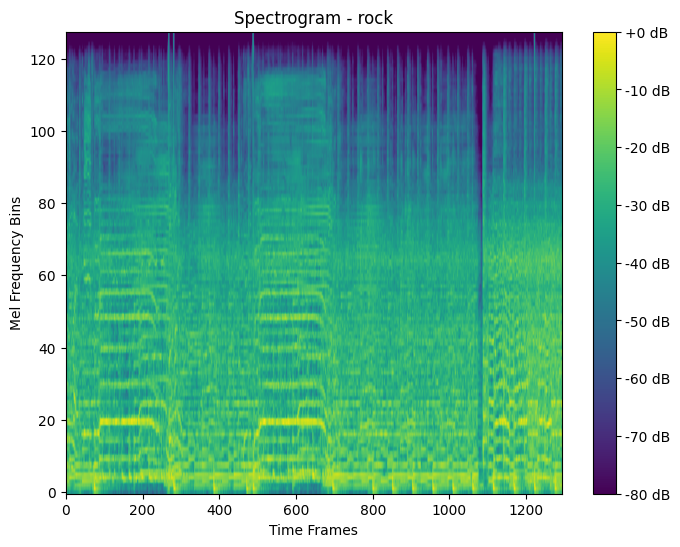

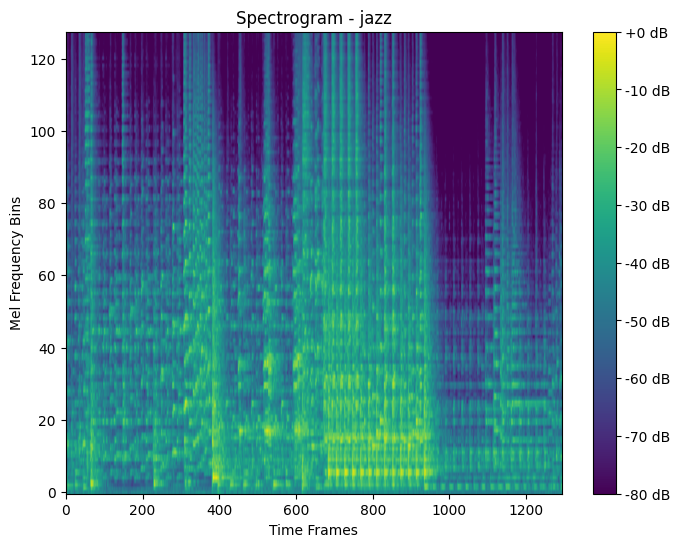

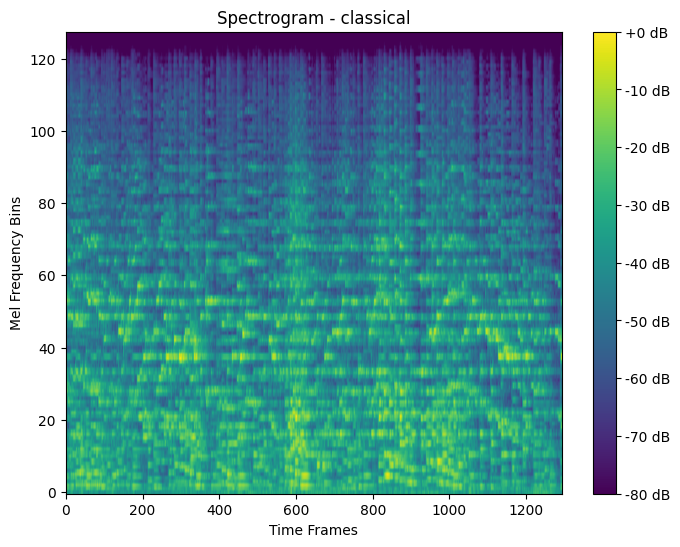

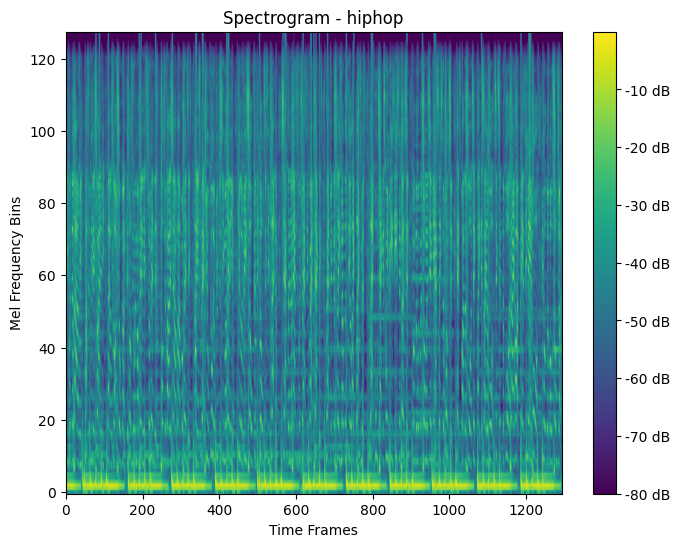

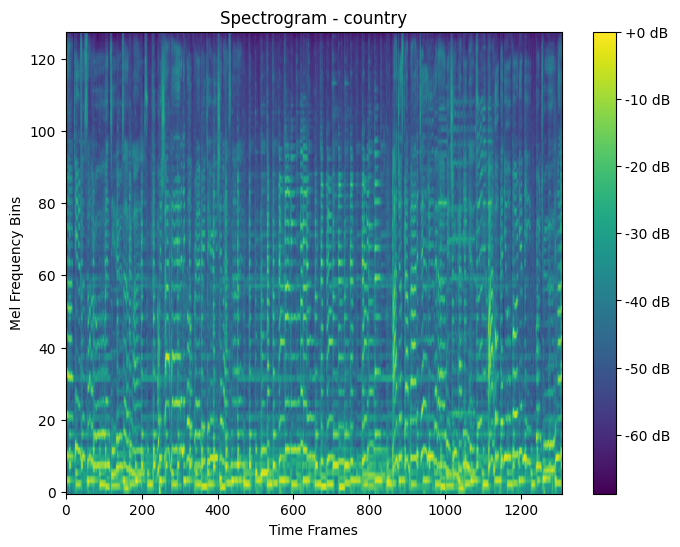

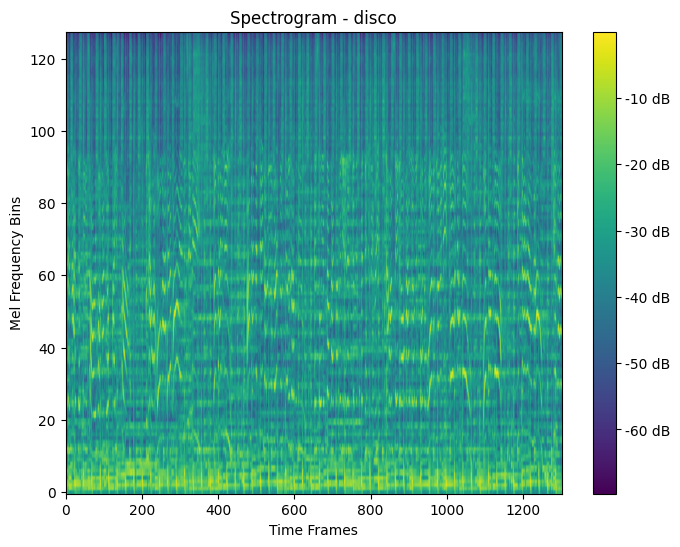

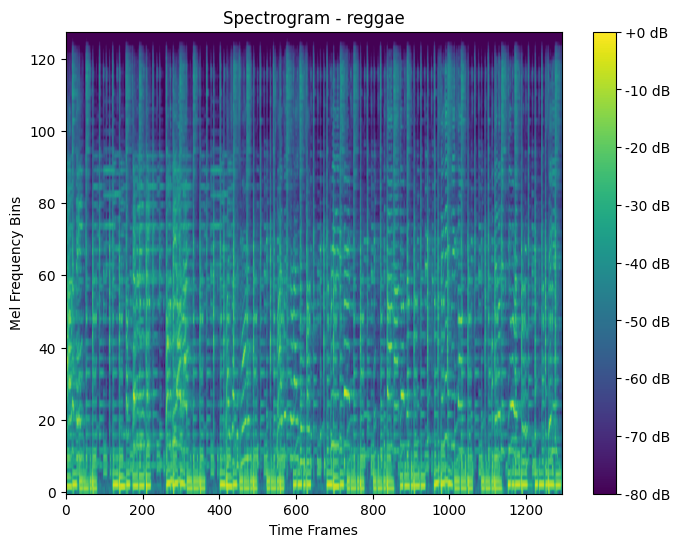

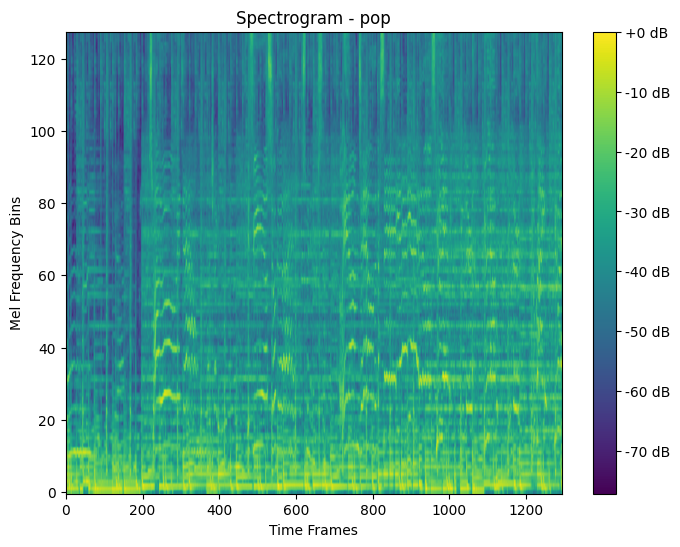

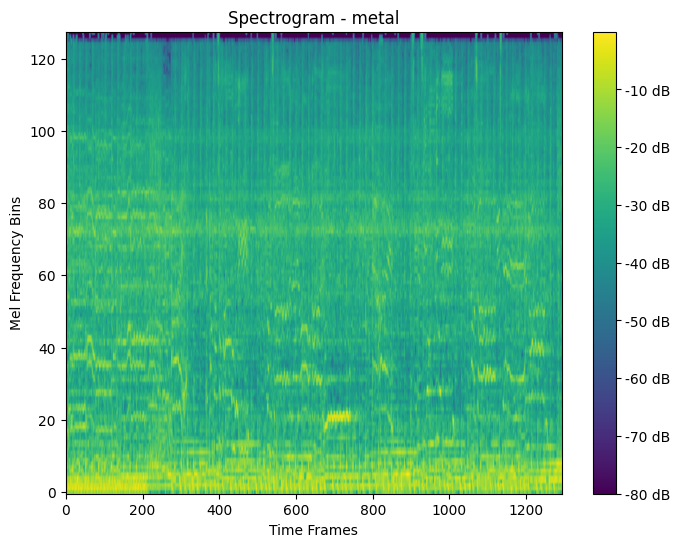

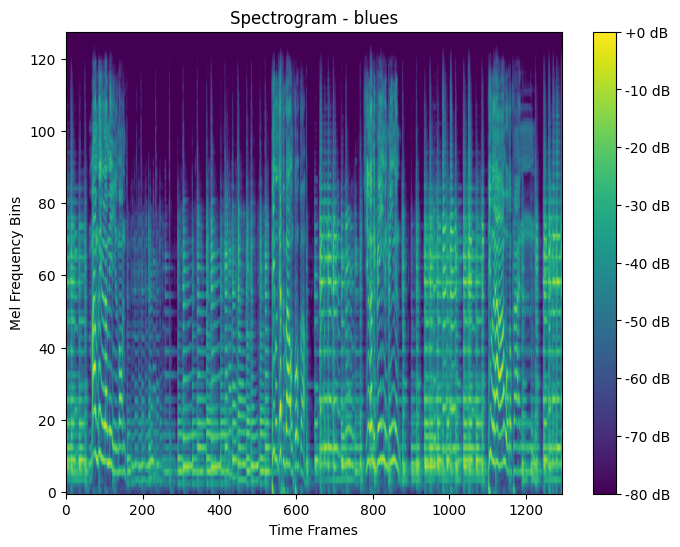

In [71]:
# Plot spectrograms for different genres
for genre in genres:
    genre_path = os.path.join(data_path, genre)
    for file in os.listdir(genre_path):
        if file.endswith('.wav'):
            audio_path = os.path.join(genre_path, file)
            spectrogram = generate_spectrogram(audio_path)

            plt.figure(figsize=(8, 6))
            plt.imshow(spectrogram, cmap='viridis', origin='lower', aspect='auto')
            plt.title(f'Spectrogram - {genre}')
            plt.xlabel('Time Frames')
            plt.ylabel('Mel Frequency Bins')
            plt.colorbar(format='%+2.0f dB')
            plt.show()
            break


In [57]:
genres = os.listdir(data_path)
num_mels = 128
max_frames = 1293
padded_spectrograms = []
y = []

In [48]:
# Convert genre labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [51]:
padded_spectrograms = []  # List to store padded spectrograms
y = []  # List to store labels

for genre in genres:
    genre_path = os.path.join(data_path, genre)
    for file in os.listdir(genre_path):
        if file.endswith('.wav'):
            try:
                spectrogram = generate_spectrogram(os.path.join(genre_path, file), n_mels=num_mels)
                # Pad or truncate the spectrogram to have a fixed number of time frames
                if spectrogram.shape[1] < max_frames:
                    spectrogram = np.pad(spectrogram, ((0, 0), (0, max_frames - spectrogram.shape[1])), mode='constant')
                else:
                    spectrogram = spectrogram[:, :max_frames]
                padded_spectrograms.append(spectrogram)
                y.append(genre)
            except Exception as e:
                print(f"Error processing {file}: {e}")
                continue  # Skip this file and continue with the next one

X = np.array(padded_spectrograms)  # Convert to a NumPy array
y = np.array(y)  # Convert labels to a NumPy array

# Convert genre labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Architecture for the Convolutional Neural Network model.

In [53]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()
model.add(layers.Input(shape=(num_mels, max_frames, 1)))  # Input shape should match the spectrogram shape
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(genres), activation='softmax'))  # Output layer with softmax activation


In [54]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [55]:
# Reshape input data to match the CNN model's input shape
X_train_reshaped = X_train.reshape(X_train.shape[0], num_mels, max_frames, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], num_mels, max_frames, 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
25/25 [==============================] - 334s 13s/step - loss: 78.2678 - accuracy: 0.1039 - val_loss: 2.3025 - val_accuracy: 0.1100
Epoch 2/10
25/25 [==============================] - 323s 13s/step - loss: 2.3173 - accuracy: 0.1014 - val_loss: 2.3028 - val_accuracy: 0.1100
Epoch 3/10
25/25 [==============================] - 322s 13s/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3031 - val_accuracy: 0.1100
Epoch 4/10
25/25 [==============================] - 351s 14s/step - loss: 2.3025 - accuracy: 0.0976 - val_loss: 2.3034 - val_accuracy: 0.1100
Epoch 5/10
25/25 [==============================] - 323s 13s/step - loss: 2.3024 - accuracy: 0.0951 - val_loss: 2.3040 - val_accuracy: 0.0550
Epoch 6/10
25/25 [==============================] - 320s 13s/step - loss: 2.3024 - accuracy: 0.1101 - val_loss: 2.3045 - val_accuracy: 0.0550
Epoch 7/10
25/25 [==============================] - 317s 13s/step - loss: 2.3023 - accuracy: 0.1101 - val_loss: 2.3048 - val_accuracy: 0.0550
Epoch

In [56]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f"Test accuracy: {test_acc}")

7/7 [==============================] - 29s 4s/step - loss: 2.3062 - accuracy: 0.0550
Test accuracy: 0.054999999701976776


## Analysis

The accuracy of the model, as displayed in the training output, is quite low, hovering around 11% for both the training and validation sets across all 10 epochs. This low accuracy indicates that the model's predictive performance is quite poor and only marginally better than random chance.


Given this low accuracy, it's crucial to carefully assess various aspects of the model, including its architecture, hyperparameters, and data preprocessing. It's possible that the model's complexity might be inadequate for the task, or there could be issues with the dataset, such as data quality, imbalance, or inadequate features.

Improving the accuracy of the model would require comprehensive adjustments, including experimenting with different model architectures, incorporating regularization techniques, adjusting hyperparameters, and refining data preprocessing steps.